# Data Cleaning Step
## Need to combine all datasets, and start data cleaning process. Steps listed below

- Check for missing data 

- Check for outliers and doubles 

- Change Price Column
    - Cut dollar sign
    - cut , in price
    
- Change Area Column 
    - Cut sqft from string and , 
    
- Bedrooms / Bathrooms 
    - cut beds and baths, change studio to 1 room 

- Parking 
    - change to yes/no 

- Convert All Numbers to Integers

- Make new column 'price/sqft' 

### Imports

In [11]:
import pandas as pd
import os
import seaborn as sns

## Combining All Datasets

In [3]:
dfInd = pd.read_csv('Indianapolis_DataFinal.csv')
dfCol = pd.read_csv('ColoradoSprings_Data.csv')
dfAlb = pd.read_csv('Albuquerque_Data.csv')
dfPhil = pd.read_csv('Philadelphia_Data.csv')
dfSan = pd.read_csv('SanDiego_Data.csv')

In [4]:
dfcombined = pd.concat([dfInd, dfCol, dfAlb, dfPhil, dfSan], ignore_index=True, sort=False)

In [6]:
dfcombined.to_csv('CombinedData.csv', encoding='utf-8', index=False)

In [40]:
dfcombined = pd.read_csv('CombinedData.csv')

## Data Cleaning Process

In [41]:
dfcombined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5208 entries, 0 to 5207
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Address     4940 non-null   object
 1   Bedrooms    4389 non-null   object
 2   Bathrooms   4293 non-null   object
 3   Area        4253 non-null   object
 4   Year Built  4319 non-null   object
 5   Parking     4940 non-null   object
 6   Price       4928 non-null   object
 7   Location    5208 non-null   object
dtypes: object(8)
memory usage: 325.6+ KB


### Getting rid of NA values

In [42]:
dfcombined[dfcombined.isna().any(axis=1)]
#checking for at least one missing value in row

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price,Location
8,8355 Fieldfare Way,NaN,NaN,NaN,NaN,No Info,"$40,000",Indianapolis
13,11805 E 62nd St,Studio,NaN,NaN,NaN,No Info,"$3,000,000",Indianapolis
20,41 N Euclid Ave,6 Beds,3 Baths,NaN,Year Built: 1920,No Info,"$199,900",Indianapolis
58,2937 W 10th St,5 Beds,5 Baths,NaN,Year Built: 1913,No Info,"$259,990",Indianapolis
59,7338 Five Points Rd,NaN,NaN,NaN,NaN,No Info,"$595,000",Indianapolis
...,...,...,...,...,...,...,...,...
5181,Vacant Lot Off Eldorado Dr,NaN,NaN,NaN,NaN,No Info,"$1,560,000",San Diego
5182,2500 6th Ave #4,4 Beds,5 Baths,"5,000 sqft",NaN,Garage,"$14,995,000",San Diego
5188,3971 32nd St,NaN,NaN,NaN,NaN,No Info,"$2,850,000",San Diego
5199,7570 La Jolla Blvd,NaN,NaN,NaN,NaN,No Info,"$6,390,000",San Diego


<AxesSubplot: >

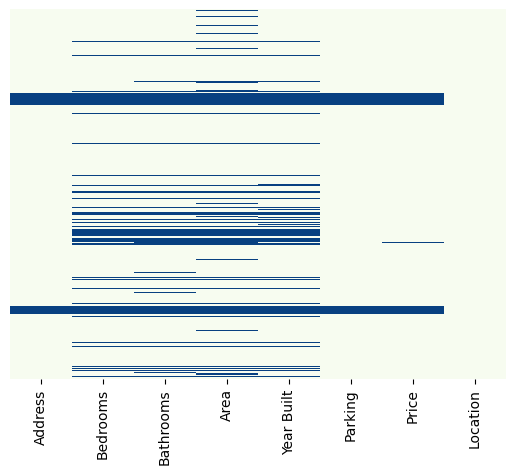

In [43]:
#making heatmap of missing values
sns.heatmap(dfcombined.isna(), yticklabels = False, cbar = False, cmap = 'GnBu')

In [44]:
#Dropping results with n/a values
dfcombined = dfcombined.dropna()

In [45]:
len(dfcombined)

4147

In [47]:
#Showing that all rows have non-null values
dfcombined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4147 entries, 0 to 5207
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Address     4147 non-null   object
 1   Bedrooms    4147 non-null   object
 2   Bathrooms   4147 non-null   object
 3   Area        4147 non-null   object
 4   Year Built  4147 non-null   object
 5   Parking     4147 non-null   object
 6   Price       4147 non-null   object
 7   Location    4147 non-null   object
dtypes: object(8)
memory usage: 291.6+ KB


### Checking for duplicates

In [48]:
dfcombined = dfcombined.reset_index(drop=True)

In [49]:
dfcombined

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price,Location
0,2926 Forest Manor Ave,3 Beds,1 Bath,864 sqft,Year Built: 1911,Garage,"$85,000",Indianapolis
1,8820 Yardley Ct #208,2 Beds,2 Baths,"1,070 sqft",Year Built: 1993,No Info,"$159,900",Indianapolis
2,2169 Kildare Ave,2 Beds,1 Bath,"1,544 sqft",Year Built: 1940,Garage,"$152,000",Indianapolis
3,4741 Bridgefield Dr,2 Beds,2 Baths,"1,312 sqft",Year Built: 1998,2 Car Garage,"$180,000",Indianapolis
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3 Beds,3 Baths,"2,141 sqft",Year Built: 2023,No Info,"$400,000+",Indianapolis
...,...,...,...,...,...,...,...,...
4142,8517 Even Seth Cir,4 Beds,3 Baths,"2,217 sqft",Year Built: 2018,3 Car Garage,"$1,199,000",San Diego
4143,13104 Dana Vista St #350,4 Beds,2 Baths,"1,980 sqft",Year Built: 2006,Carport,"$395,500",San Diego
4144,3906 Stanford Dr,4 Beds,3 Baths,"2,398 sqft",Year Built: 1992,3 Car Garage,"$975,000",San Diego
4145,3365 Donna Dr,3 Beds,3 Baths,"1,680 sqft",Year Built: 1976,2 Car Garage,"$1,495,000",San Diego


In [50]:
dfcombined.duplicated().sum()

537

In [51]:
#537 duplicated entries
dfcombined.loc[dfcombined.duplicated(), :]

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price,Location
536,2926 Forest Manor Ave,3 Beds,1 Bath,864 sqft,Year Built: 1911,Garage,"$85,000",Indianapolis
537,8820 Yardley Ct #208,2 Beds,2 Baths,"1,070 sqft",Year Built: 1993,No Info,"$159,900",Indianapolis
538,2169 Kildare Ave,2 Beds,1 Bath,"1,544 sqft",Year Built: 1940,Garage,"$152,000",Indianapolis
539,4741 Bridgefield Dr,2 Beds,2 Baths,"1,312 sqft",Year Built: 1998,2 Car Garage,"$180,000",Indianapolis
540,Grandover Plan in Edgewood Farms by D.R. Horto...,3 Beds,3 Baths,"2,141 sqft",Year Built: 2023,No Info,"$400,000+",Indianapolis
...,...,...,...,...,...,...,...,...
1068,7131 Parkstay Ct,4 Beds,3 Baths,"2,053 sqft",Year Built: 2023,2 Car Garage,"$329,000",Indianapolis
1069,809 W Edgewood Ave,3 Beds,2 Baths,"1,767 sqft (on 0.55 acres)",Year Built: 1969,1 Car Garage,"$275,000",Indianapolis
1070,2245 Brookside Ave,3 Beds,1 Bath,"1,680 sqft",Year Built: 1907,No Info,"$125,000",Indianapolis
1071,3818 N Park Ave,3 Beds,2 Baths,"2,034 sqft",Year Built: 1905,Garage,"$269,000",Indianapolis


In [52]:
#remove duplicate entries 
dfcombined = dfcombined.drop_duplicates()

In [62]:
dfcombined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3610 entries, 0 to 3609
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Address     3610 non-null   object
 1   Bedrooms    3610 non-null   object
 2   Bathrooms   3610 non-null   object
 3   Area        3610 non-null   object
 4   Year Built  3610 non-null   object
 5   Parking     3610 non-null   object
 6   Price($)    3610 non-null   object
 7   Location    3610 non-null   object
dtypes: object(8)
memory usage: 225.8+ KB


In [54]:
#fix index again
dfcombined = dfcombined.reset_index(drop=True)

### Converting string elements to integers
#### Remove dollar signs, remove commas from price, change price string to integer to make it database readable

In [57]:
dfcombined = dfcombined.rename(columns = {'Price':'Price($)'})

In [58]:
dfcombined.head()

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price($),Location
0,2926 Forest Manor Ave,3 Beds,1 Bath,864 sqft,Year Built: 1911,Garage,"$85,000",Indianapolis
1,8820 Yardley Ct #208,2 Beds,2 Baths,"1,070 sqft",Year Built: 1993,No Info,"$159,900",Indianapolis
2,2169 Kildare Ave,2 Beds,1 Bath,"1,544 sqft",Year Built: 1940,Garage,"$152,000",Indianapolis
3,4741 Bridgefield Dr,2 Beds,2 Baths,"1,312 sqft",Year Built: 1998,2 Car Garage,"$180,000",Indianapolis
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3 Beds,3 Baths,"2,141 sqft",Year Built: 2023,No Info,"$400,000+",Indianapolis


In [59]:
dfcombined['Price($)'] = dfcombined['Price($)'].str.strip('$')

In [61]:
dfcombined.head()

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price($),Location
0,2926 Forest Manor Ave,3 Beds,1 Bath,864 sqft,Year Built: 1911,Garage,"85,000",Indianapolis
1,8820 Yardley Ct #208,2 Beds,2 Baths,"1,070 sqft",Year Built: 1993,No Info,"159,900",Indianapolis
2,2169 Kildare Ave,2 Beds,1 Bath,"1,544 sqft",Year Built: 1940,Garage,"152,000",Indianapolis
3,4741 Bridgefield Dr,2 Beds,2 Baths,"1,312 sqft",Year Built: 1998,2 Car Garage,"180,000",Indianapolis
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3 Beds,3 Baths,"2,141 sqft",Year Built: 2023,No Info,"400,000+",Indianapolis


In [63]:
dfcombined['Price($)'] = dfcombined['Price($)'].str.replace(',', '')

In [64]:
dfcombined.head()

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price($),Location
0,2926 Forest Manor Ave,3 Beds,1 Bath,864 sqft,Year Built: 1911,Garage,85000,Indianapolis
1,8820 Yardley Ct #208,2 Beds,2 Baths,"1,070 sqft",Year Built: 1993,No Info,159900,Indianapolis
2,2169 Kildare Ave,2 Beds,1 Bath,"1,544 sqft",Year Built: 1940,Garage,152000,Indianapolis
3,4741 Bridgefield Dr,2 Beds,2 Baths,"1,312 sqft",Year Built: 1998,2 Car Garage,180000,Indianapolis
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3 Beds,3 Baths,"2,141 sqft",Year Built: 2023,No Info,400000+,Indianapolis


In [66]:
dfcombined['Price($)'] = dfcombined['Price($)'].str.strip('+')

In [67]:
dfcombined.head()

,Address,Bedrooms,Bathrooms,Area,Year Built,Parking,Price($),Location
0,2926 Forest Manor Ave,3 Beds,1 Bath,864 sqft,Year Built: 1911,Garage,85000,Indianapolis
1,8820 Yardley Ct #208,2 Beds,2 Baths,"1,070 sqft",Year Built: 1993,No Info,159900,Indianapolis
2,2169 Kildare Ave,2 Beds,1 Bath,"1,544 sqft",Year Built: 1940,Garage,152000,Indianapolis
3,4741 Bridgefield Dr,2 Beds,2 Baths,"1,312 sqft",Year Built: 1998,2 Car Garage,180000,Indianapolis
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3 Beds,3 Baths,"2,141 sqft",Year Built: 2023,No Info,400000,Indianapolis


### Changing other columns
#### deleting sqft from Area column and year built from year column, etc

In [68]:
dfcombined = dfcombined.rename(columns = {'Area':'Area(sqft)'})

In [69]:
dfcombined.to_csv('CombinedDataDuringClean.csv', encoding='utf-8', index=False)

In [71]:
#saved csv file for backup just in case I mess up the dataframe

dfcombined['Area(sqft)'] = dfcombined['Area(sqft)'].str.replace(' sqft', '')

In [72]:
dfcombined.head()

,Address,Bedrooms,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location
0,2926 Forest Manor Ave,3 Beds,1 Bath,864,Year Built: 1911,Garage,85000,Indianapolis
1,8820 Yardley Ct #208,2 Beds,2 Baths,"1,070",Year Built: 1993,No Info,159900,Indianapolis
2,2169 Kildare Ave,2 Beds,1 Bath,"1,544",Year Built: 1940,Garage,152000,Indianapolis
3,4741 Bridgefield Dr,2 Beds,2 Baths,"1,312",Year Built: 1998,2 Car Garage,180000,Indianapolis
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3 Beds,3 Baths,"2,141",Year Built: 2023,No Info,400000,Indianapolis


In [78]:
dfcombined['Area(sqft)'] = dfcombined['Area(sqft)'].str.replace(',','')

In [79]:
dfcombined

,Address,Bedrooms,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location
0,2926 Forest Manor Ave,3 Beds,1 Bath,864,Year Built: 1911,Garage,85000,Indianapolis
1,8820 Yardley Ct #208,2 Beds,2 Baths,1070,Year Built: 1993,No Info,159900,Indianapolis
2,2169 Kildare Ave,2 Beds,1 Bath,1544,Year Built: 1940,Garage,152000,Indianapolis
3,4741 Bridgefield Dr,2 Beds,2 Baths,1312,Year Built: 1998,2 Car Garage,180000,Indianapolis
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3 Beds,3 Baths,2141,Year Built: 2023,No Info,400000,Indianapolis
...,...,...,...,...,...,...,...,...
3605,8517 Even Seth Cir,4 Beds,3 Baths,2217,Year Built: 2018,3 Car Garage,1199000,San Diego
3606,13104 Dana Vista St #350,4 Beds,2 Baths,1980,Year Built: 2006,Carport,395500,San Diego
3607,3906 Stanford Dr,4 Beds,3 Baths,2398,Year Built: 1992,3 Car Garage,975000,San Diego
3608,3365 Donna Dr,3 Beds,3 Baths,1680,Year Built: 1976,2 Car Garage,1495000,San Diego


Deleting anything after a space in the area column, to remove any extra info, like acerage included etc. Not needed in this column.

In [81]:
dfcombined['Area(sqft)'] = dfcombined['Area(sqft)'].str.replace("( ).*","")

C:\Users\cdmel\AppData\Local\Temp\ipykernel_19612\1764279034.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dfcombined['Area(sqft)'] = dfcombined['Area(sqft)'].str.replace("( ).*","")


In [82]:
dfcombined

,Address,Bedrooms,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location
0,2926 Forest Manor Ave,3 Beds,1 Bath,864,Year Built: 1911,Garage,85000,Indianapolis
1,8820 Yardley Ct #208,2 Beds,2 Baths,1070,Year Built: 1993,No Info,159900,Indianapolis
2,2169 Kildare Ave,2 Beds,1 Bath,1544,Year Built: 1940,Garage,152000,Indianapolis
3,4741 Bridgefield Dr,2 Beds,2 Baths,1312,Year Built: 1998,2 Car Garage,180000,Indianapolis
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3 Beds,3 Baths,2141,Year Built: 2023,No Info,400000,Indianapolis
...,...,...,...,...,...,...,...,...
3605,8517 Even Seth Cir,4 Beds,3 Baths,2217,Year Built: 2018,3 Car Garage,1199000,San Diego
3606,13104 Dana Vista St #350,4 Beds,2 Baths,1980,Year Built: 2006,Carport,395500,San Diego
3607,3906 Stanford Dr,4 Beds,3 Baths,2398,Year Built: 1992,3 Car Garage,975000,San Diego
3608,3365 Donna Dr,3 Beds,3 Baths,1680,Year Built: 1976,2 Car Garage,1495000,San Diego


#### Bedrooms and Bathrooms column editing

In [83]:
dfcombined['Bedrooms'] = dfcombined['Bedrooms'].str.replace(' Beds','')

In [84]:
dfcombined['Bedrooms'] = dfcombined['Bedrooms'].str.replace(' Bed','')

In [86]:
dfcombined

,Address,Bedrooms,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location
0,2926 Forest Manor Ave,3,1 Bath,864,Year Built: 1911,Garage,85000,Indianapolis
1,8820 Yardley Ct #208,2,2 Baths,1070,Year Built: 1993,No Info,159900,Indianapolis
2,2169 Kildare Ave,2,1 Bath,1544,Year Built: 1940,Garage,152000,Indianapolis
3,4741 Bridgefield Dr,2,2 Baths,1312,Year Built: 1998,2 Car Garage,180000,Indianapolis
4,Grandover Plan in Edgewood Farms by D.R. Horto...,3,3 Baths,2141,Year Built: 2023,No Info,400000,Indianapolis
...,...,...,...,...,...,...,...,...
3605,8517 Even Seth Cir,4,3 Baths,2217,Year Built: 2018,3 Car Garage,1199000,San Diego
3606,13104 Dana Vista St #350,4,2 Baths,1980,Year Built: 2006,Carport,395500,San Diego
3607,3906 Stanford Dr,4,3 Baths,2398,Year Built: 1992,3 Car Garage,975000,San Diego
3608,3365 Donna Dr,3,3 Baths,1680,Year Built: 1976,2 Car Garage,1495000,San Diego


In [92]:
#amount of rows in the bedrooms column with studio in the name
len(dfcombined.loc[dfcombined['Bedrooms'].isin(['Studio'])])

17

In [94]:
dfcombined['Bedrooms'].value_counts()

3         1448
4          839
2          621
5          397
6          134
1          104
7           20
8           17
Studio      17
10           6
9            3
14           2
49           1
11           1
Name: Bedrooms, dtype: int64

In [95]:
#I think I want to change studio to 0 bedroom
dfcombined['Bedrooms'] = dfcombined['Bedrooms'].apply(lambda x: 0 if 'Studio' in x else x)
#dfcombined['Bedrooms'] = dfcombined['Bedrooms'].str.replace('Studio','0')

In [96]:
dfcombined['Bedrooms'].value_counts()

3     1448
4      839
2      621
5      397
6      134
1      104
7       20
8       17
0       17
10       6
9        3
14       2
49       1
11       1
Name: Bedrooms, dtype: int64